#**Model Selection**

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/Social_Network_Ads.csv')
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
data.isnull().dropna()

,Age,EstimatedSalary,Purchased
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
395,False,False,False
396,False,False,False
397,False,False,False
398,False,False,False


##**Splitting the dataset into the Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

##**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

##**Training the Kernel SVM model on the Training set**

In [ ]:
from sklearn.svm import SVC
classifier = SVC( C = 0.5, gamma = 0.6, kernel= 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(C=0.5, gamma=0.6, random_state=0)

##**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 3 29]]


0.93

##**K-Fold Cross validation**

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator =classifier, X = x_train , y = y_train ,cv= 10 ) 
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: 90.67 %
Standard Deviation: 6.11 %


##**Grid Search to find the best Model and best Parameters** 

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C':[0.25,0.5,0.75,1],'kernel':['linear']},
              {'C':[0.25,0.5,0.75,1],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid_search = GridSearchCV(estimator=classifier,
                           param_grid = parameters,
                           scoring='accuracy',
                           cv = 10,
                           n_jobs = -1 )#number of processor used, -1 will use all of the process  

grid_search.fit(x_train,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters: ",best_parameters)

Accuracy: 90.67 %
Best Parameters:  {'C': 0.5, 'gamma': 0.6, 'kernel': 'rbf'}


##**Visualising the Training set results**

<ipython-input-45-47d22b8c78b8>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


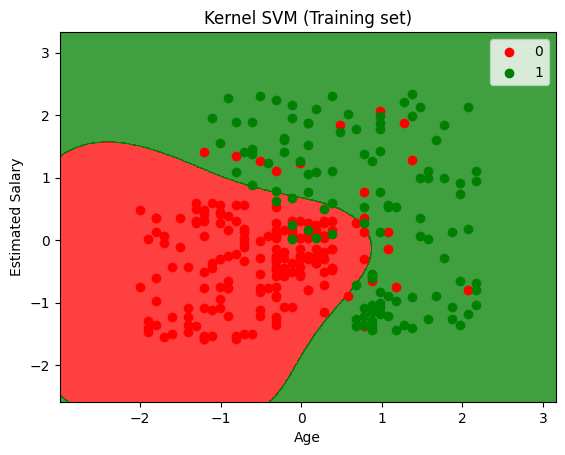

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

##**Visualising the Test set results**

<ipython-input-46-50c51ff6b5aa>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


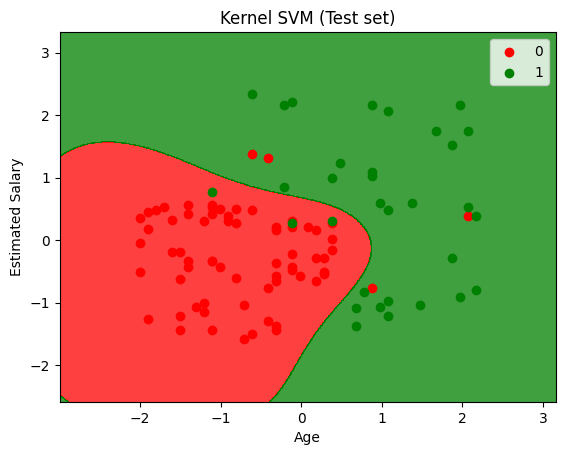

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()